In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [8]:
x_train = x_train.astype(float)
x_test = x_test.astype(float)

In [9]:
x_train = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test = (x_test - x_test.min()) / (x_test.max() - x_test.min())

In [10]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

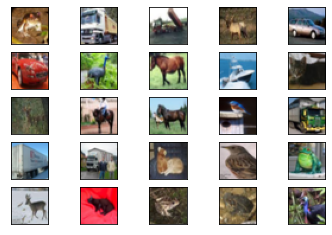

In [15]:
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])

In [24]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),              
             metrics=[tf.keras.metrics.CategoricalAccuracy()])
# model.summary()

In [25]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1)

Epoch 1/10
782/782 [==============================] - 41s 52ms/step - loss: 1.6011 - categorical_accuracy: 0.4169
Epoch 2/10
782/782 [==============================] - 39s 50ms/step - loss: 1.2322 - categorical_accuracy: 0.5622
Epoch 3/10
782/782 [==============================] - 41s 53ms/step - loss: 1.0861 - categorical_accuracy: 0.6198
Epoch 4/10
782/782 [==============================] - 43s 55ms/step - loss: 0.9948 - categorical_accuracy: 0.6508
Epoch 5/10
782/782 [==============================] - 42s 53ms/step - loss: 0.9262 - categorical_accuracy: 0.6769
Epoch 6/10
782/782 [==============================] - 43s 54ms/step - loss: 0.8678 - categorical_accuracy: 0.6970
Epoch 7/10
782/782 [==============================] - 43s 54ms/step - loss: 0.8168 - categorical_accuracy: 0.7138
Epoch 8/10
782/782 [==============================] - 43s 56ms/step - loss: 0.7725 - categorical_accuracy: 0.7295
Epoch 9/10
782/782 [==============================] - 41s 53ms/step - loss: 0.7363 - cat

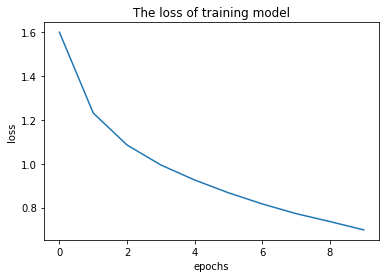

In [26]:
plt.plot(history.history['loss'])
plt.title('The loss of training model')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

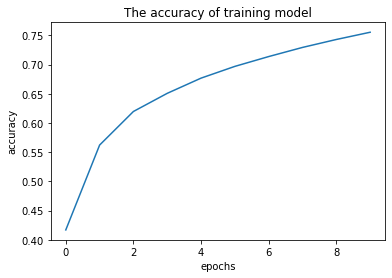

In [27]:
plt.plot(history.history['categorical_accuracy'])
plt.title('The accuracy of training model')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [28]:
score = model.evaluate(x_test, y_test)
print("Test Loss: ", score[0])
print("Test Accuracy: ", score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.8651 - categorical_accuracy: 0.7058
Test Loss:  0.8650838732719421
Test Accuracy:  0.7057999968528748
